We first load the financial data into the R runtime workspace

In [37]:
library(magrittr)
library(corrplot)
load("./data/Financial.rda")

This dataset contains the financial information of about 100 companies including
their __type__ (type), __revenue__ (rev), __assets__ (assets), __return of investment__ (roe),
__Earnings Per Share__ (eps), __yield__ (yield), __Dividend Per Share__ (dps) and finally
their __Property, Plant and Equipment (ppe)__.

In [38]:
head(Financial)

company,type,rev,assets,roe,eps,yield,dps,ppe
AFLAC,6,7251,29454,17.1,2.08,0.9,0.22,11.5
Albertson's,4,14690,5219,21.4,2.08,1.6,0.63,19.0
Allstate,6,20106,80918,20.1,3.56,1.0,0.36,10.6
Amerada Hess,7,8340,7935,0.2,0.08,1.1,0.60,698.3
American General,6,3362,80620,7.1,2.19,3.0,1.40,21.2
American Stores,4,19139,8536,12.2,1.01,1.4,0.34,23.5


In [39]:
lapply(colnames(Financial), paste)

[[1]]
[1] "company"

[[2]]
[1] "type"

[[3]]
[1] "rev"

[[4]]
[1] "assets"

[[5]]
[1] "roe"

[[6]]
[1] "eps"

[[7]]
[1] "yield"

[[8]]
[1] "dps"

[[9]]
[1] "ppe"

In [40]:
fn_names <- c("Mean", "Median", "Standard Deviation")
fn <- list(mean, median, sd)

for (i in seq_along(fn)) {
    out <- sprintf("%s: %g", fn_names[i], fn[[i]](Financial$rev))
    print(out)
}


[1] "Mean: 11043.4"
[1] "Median: 6101"
[1] "Standard Deviation: 17479.1"


Let's find highest (max) revenue from all the companies

In [41]:
max(Financial$rev)

[1] 137242

Now lets find the row or record that owns the highest revenue

In [42]:
Financial[which.max(Financial$rev),]

,company,type,rev,assets,roe,eps,yield,dps,ppe
31,Exxon,7,137242,96064,19.4,3.37,2.8,1.63,17.1


How about finding the company with the lowest (min) revenue

In [43]:
Financial[which.min(Financial$rev),]

,company,type,rev,assets,roe,eps,yield,dps,ppe
72,Poe & Brown,6,129,194,25.1,1.48,1.5,0.35,16.3


What are the top 5 companies with the highest assets

In [44]:
Financial$assets %>% 
    order %>% 
    tail(5) %>% 
    `[`(Financial, .,)

,company,type,rev,assets,roe,eps,yield,dps,ppe
3,Allstate,6,20106,80918,20.1,3.56,1.0,0.36,10.6
31,Exxon,7,137242,96064,19.4,3.37,2.8,1.63,17.1
17,CIGNA,6,14935,108199,13.7,4.88,2.0,1.10,11.4
29,Equitable,6,9666,151438,12.3,2.86,0.5,0.20,13.4
87,Travelers,6,37609,386555,14.9,2.54,0.9,0.40,17.0


What is the standard deviation of “roe” values Try to calculate the standard deviation without using the sd() command and by formula, then use the sd() command and compare the results.

The code bellow is the functional way of representing the formula for standard deviation

In [45]:
minus <- `-`
pow <- `^`
divide_by <- `/`

st_dev <- Financial$roe %>%
    mean %>%
    minus(Financial$roe, .) %>%
    pow(2) %>%
    sum %>%
    divide_by(length(Financial$roe)) %>%
    sqrt

print(st_dev)

[1] 23.45448


The bellow cells are a procedural (step by step) way of representing the formula for standard deviation

In [46]:
mean_roe = mean(Financial$roe); mean_roe

[1] 18.334

In [47]:
mean_roe_diff = Financial$roe - mean_roe
print(head(mean_roe_diff, 10))

 [1]  -1.234   3.066   1.766 -18.134 -11.234  -6.134  -1.634 -12.134  -8.834
[10]   3.466


In [48]:
squared_diff = mean_roe_diff^2
print(head(squared_diff, 10))

 [1]   1.522756   9.400356   3.118756 328.841956 126.202756  37.625956
 [7]   2.669956 147.233956  78.039556  12.013156


In [49]:
squared_diff_sum = sum(squared_diff); squared_diff_sum

[1] 55011.24

In [50]:
stdev = sqrt(squared_diff_sum / length(Financial$roe)); stdev

[1] 23.45448

Let's compare the manual way of computing standard deviation with the in built function `sd` 

In [51]:
ib_stdev <- sd(Financial$roe); ib_stdev

[1] 23.57264

Let's view the skewness of rev, assets, roe, dps, and ppe. First we need to define the formula for skewness

In [53]:
skewness <- function(x) {
    return(x %>%
           mean %>%
           minus(x, .) %>%
           divide_by(sd(x)) %>%
           pow(3) %>%
           mean
          )
}

skewness(Financial$assets)

[1] 6.094588

In [54]:
col_names <- c("rev", "assets", "roe", "ppe", "dps")

for (i in seq_along(col_names)) {
    col_data <- Financial[col_names][[i]]
    out <- sprintf("Skewness of %s is %g", col_names[i], skewness(col_data))
    print(out)
}

[1] "Skewness of rev is 4.38455"
[1] "Skewness of assets is 6.09459"
[1] "Skewness of roe is 7.11518"
[1] "Skewness of ppe is 7.77205"
[1] "Skewness of dps is 1.05438"


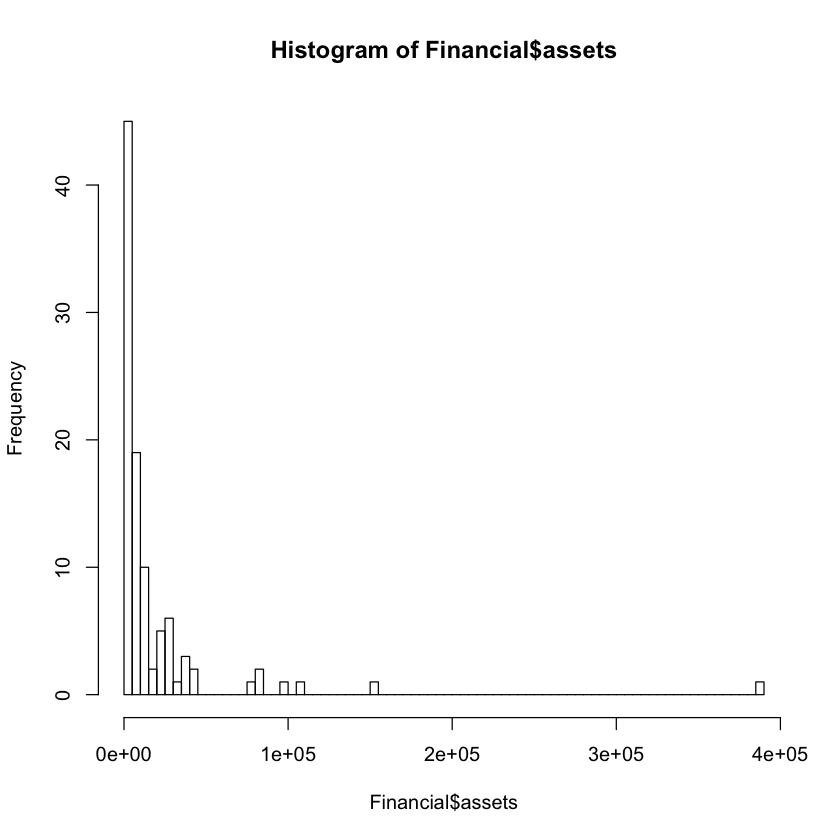

In [55]:
hist(Financial$assets, n=100)

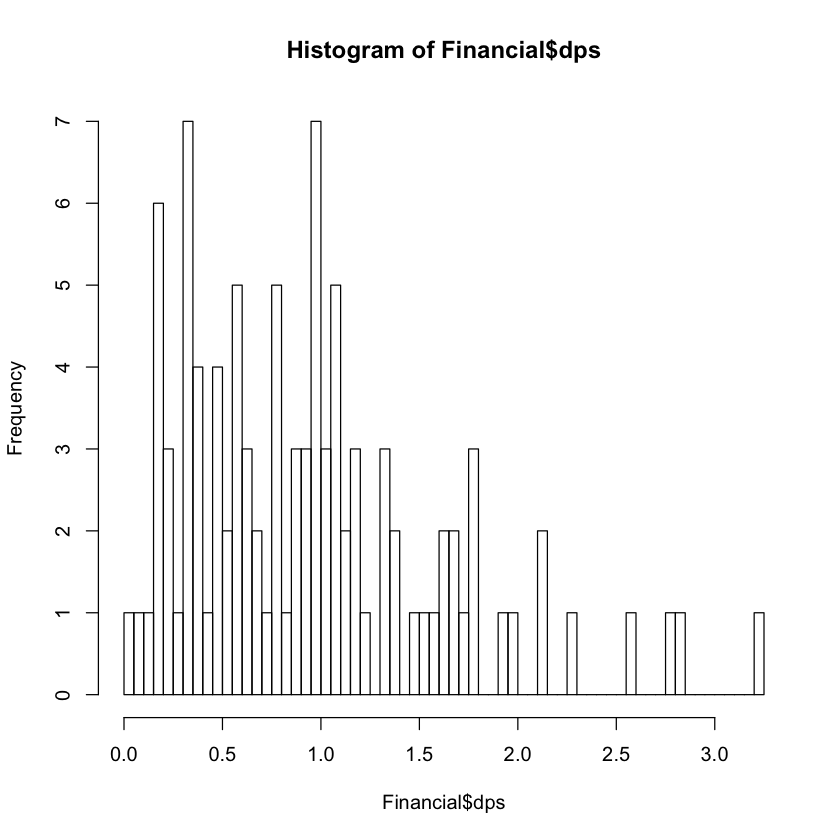

In [56]:
hist(Financial$dps, n=100)

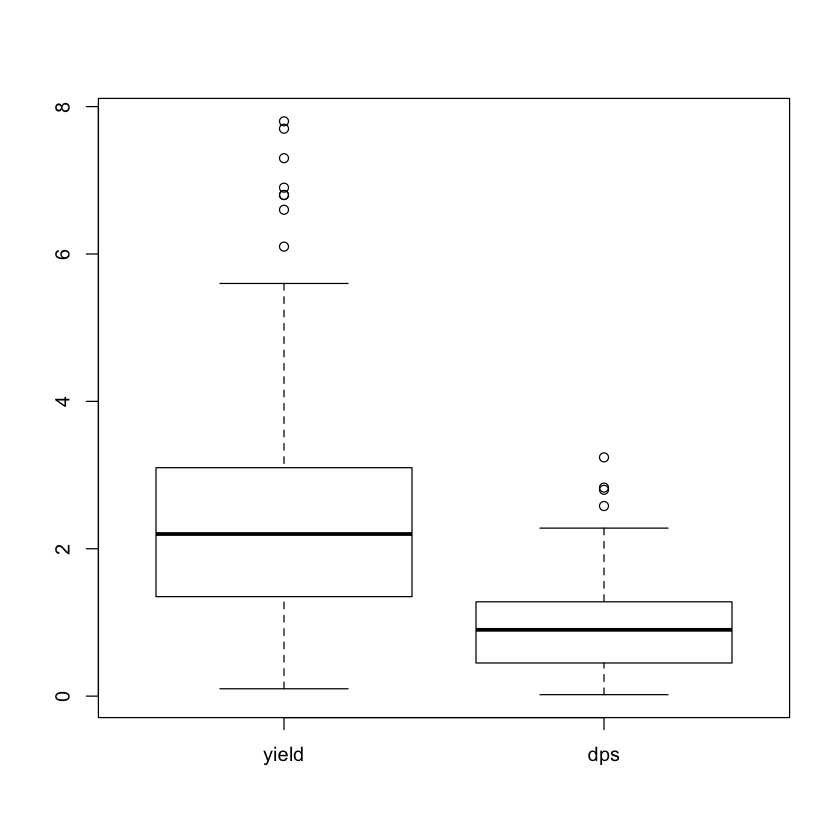

In [57]:
boxplot(Financial[c("yield", "dps")])

In [58]:
sprintf("stdev of yield: %g", sd(Financial$yield))
sprintf("stdev of dps: %g", sd(Financial$dps))

[1] "stdev of yield: 1.7376"

[1] "stdev of dps: 0.659244"

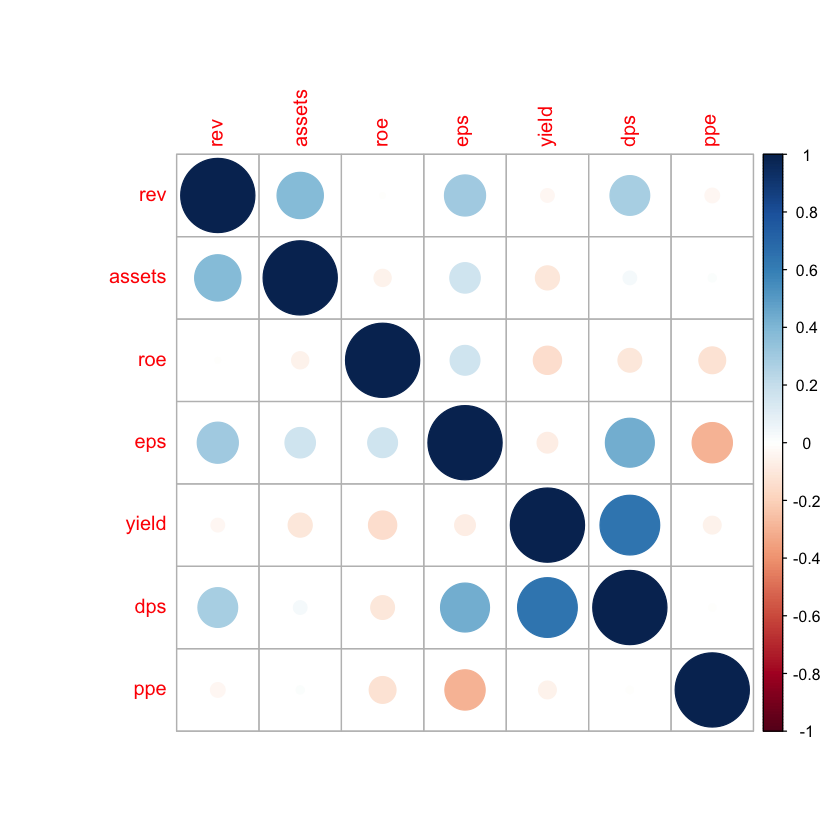

In [59]:
corrplot(cor(Financial[,3:9]))